In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pathlib
import numpy as np
from matplotlib import cm

from queso.utils.io import IO

In [89]:
ns = [2, 3, 4, 5, 6, 7]
ks = [2, 3, 4, 5, 6]

In [73]:
def load_data(io, ns, ks):
    data = {}
    for n in ns:
        _d = {}
        for k in ks:
            fid = io.path.joinpath(f'n={n}_k={k}.pkl')
            if fid.is_file():
                _df = io.load_dataframe(fid.stem)

                # fix datatype issues
                _df["cfi"] = _df["cfi"].astype('float64')

            else:
                _df = None

            _d[k] = _df
        data[n] = _d


    return data

io = IO(folder=r"noisy_cfi_batch_sweep")
data = load_data(io, ns, ks)

13/02/2023, 17:48:35 | Loaded from /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/noisy_cfi_batch_sweep/n=2_k=2.pkl successfully.
13/02/2023, 17:48:35 | Loaded from /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/noisy_cfi_batch_sweep/n=2_k=3.pkl successfully.
13/02/2023, 17:48:35 | Loaded from /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/noisy_cfi_batch_sweep/n=2_k=4.pkl successfully.
13/02/2023, 17:48:35 | Loaded from /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/noisy_cfi_batch_sweep/n=2_k=5.pkl successfully.
13/02/2023, 17:48:35 | Loaded from /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/noisy_cfi_bat

In [74]:
for n in ns:
    for k in ks:
        df = data[n][k]
        print(f"n={n}, k={k} | {df.cfi.max() if df is not None else 'NA'}")

n=2, k=2 | 3.9999999999999996
n=2, k=3 | 4.0
n=2, k=4 | 4.0
n=2, k=5 | 4.000000000000002
n=2, k=6 | 4.000000000000002
n=3, k=2 | 9.000000000000005
n=3, k=3 | 8.999999947950972
n=3, k=4 | 8.999999983950797
n=3, k=5 | 8.99999373051883
n=3, k=6 | 8.999999999997666
n=4, k=2 | 10.000000000000002
n=4, k=3 | 15.999908117750628
n=4, k=4 | 15.999982085186293
n=4, k=5 | 15.999889317228543
n=4, k=6 | 15.99994338181163
n=5, k=2 | 15.99999999997122
n=5, k=3 | 24.99955999749225
n=5, k=4 | 24.999915487267447
n=5, k=5 | 24.99956704078641
n=5, k=6 | 24.999968358803415
n=6, k=2 | 17.0
n=6, k=3 | 23.480729166222485
n=6, k=4 | 35.99999729754186
n=6, k=5 | 35.99134420492794
n=6, k=6 | 35.99891425081688
n=7, k=2 | 19.999999999999996
n=7, k=3 | 35.999999534075926
n=7, k=4 | 29.65755589073205
n=7, k=5 | 48.99997701987691
n=7, k=6 | 48.98915088060801


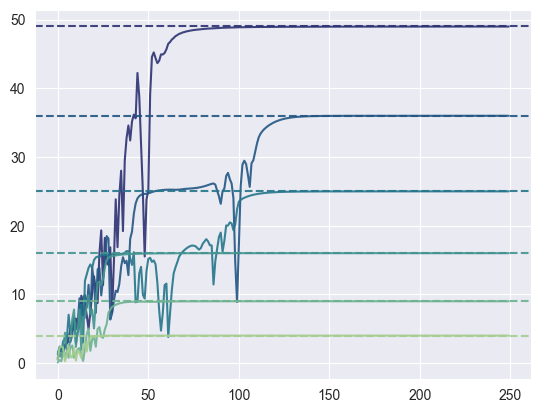

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=1)
colors = sns.color_palette("crest", as_cmap=True)
norm = lambda x: (x - np.min(ns))/(np.max(ns) - np.min(ns))
gammas = sorted(df["gamma"].unique())
gamma = gammas[0]

k = 6
for n in reversed(ns):
    ax.axhline(n**2, color=colors(norm(n)), ls='--', alpha=0.9)

    df = data[n][k]
    row = df[df["gamma"] == gamma]

    row = row.loc[row["cfi"].idxmax()]

    ax.plot(row.loss, color=colors(norm(n)), alpha=0.9)
plt.show()

### How does a fixed circuit change when noise is added after each layer?

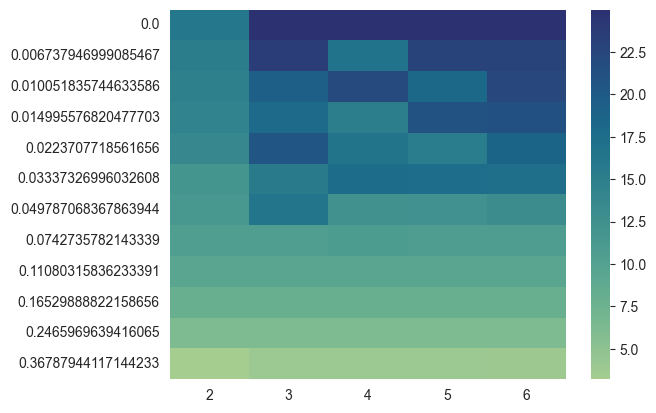

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=1)
colors = sns.color_palette("crest", as_cmap=True)
norm = lambda x: (x - np.min(ns))/(np.max(ns) - np.min(ns))
gammas = sorted(df["gamma"].unique())

n = 5
mat = np.zeros([len(ks), len(gammas)])
for i, k in enumerate(reversed(ks)):
    for j, gamma in enumerate(gammas):

        df = data[n][k]
        row = df[df["gamma"] == gamma]
        row = row.loc[row["cfi"].idxmax()]

        mat[i, j] = row["cfi"]

mat = np.flipud(mat)

sns.heatmap(mat.T, xticklabels=ks, yticklabels=gammas, cmap="crest")
plt.show()